In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("CS98XClassificationTrain.csv")
test = pd.read_csv("CS98XClassificationTest.csv")

In [3]:
train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
train["top genre"].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
latin                  1
hip pop                1
afrobeat               1
australian rock        1
acoustic blues         1
Name: top genre, Length: 86, dtype: int64

In [6]:
sample_incomplete_rows = train[train.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,NaN
26,27,Drinks On The House,Green Martini Keys,2016,97,16,57,-16,11,15,181,100,5,28,NaN
72,73,Pachuko Hop,Ike Carpenter Orchestra,2006,83,53,48,-9,34,80,135,59,3,28,NaN
90,91,Little Things Means A Lot,Jayne Mansfield,2008,109,29,70,-15,16,63,172,36,4,29,NaN


In [7]:
train["top genre"].isnull().sum()

15

In [8]:
train.count()

Id           453
title        453
artist       453
year         453
bpm          453
nrgy         453
dnce         453
dB           453
live         453
val          453
dur          453
acous        453
spch         453
pop          453
top genre    438
dtype: int64

In [48]:
#drop rows with missing values
train = train.dropna()

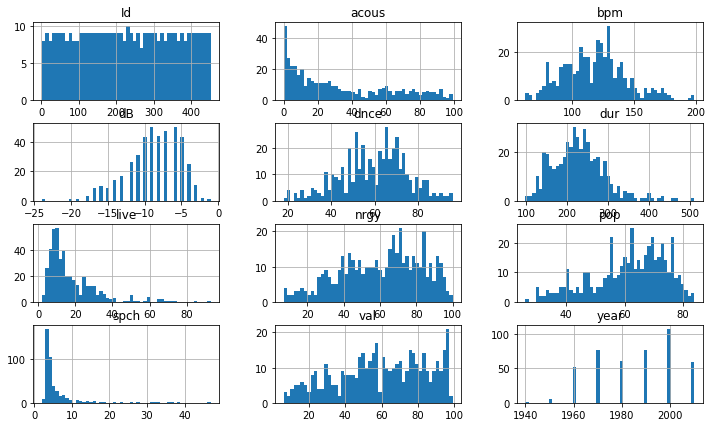

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
train.hist(bins=50, figsize=(12,7))
plt.show()

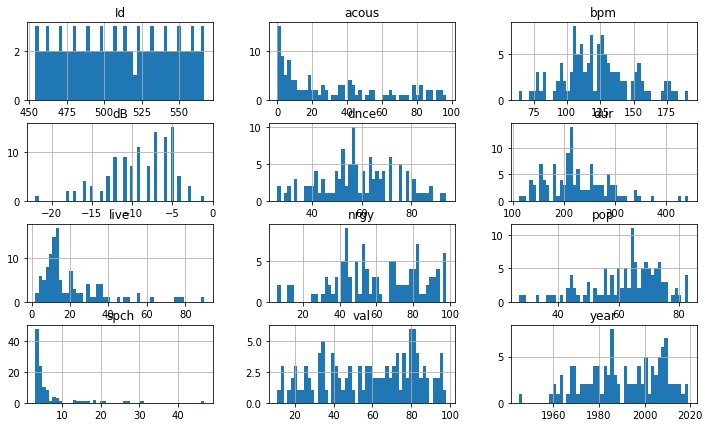

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
test.hist(bins=50, figsize=(12,7))
plt.show()
#test and train set follow reoughly the same distribution

In [53]:
#Separate X and Y for train set
X_train = X_train.iloc[:,2:14]
Y_train = train.iloc[:,14:]

In [54]:
#Change year to decade
def truncate(n):
    modulus = n%10
    return n-modulus
X_train['year'] = truncate(X_train['year'])
X_train['year']

0      1990
2      1970
3      1980
4      1970
5      2010
       ... 
448    1950
449    2010
450    2000
451    2000
452    2000
Name: year, Length: 438, dtype: int64

In [55]:
#Prepare years as categorical
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
train_years = X_train['year']
train_years_encoded, train_years_lists = train_years.factorize()
train_years_1hot = encoder.fit_transform(train_years_encoded.reshape(-1,1))
dum0 = train_years_1hot.toarray()
year_enc_data = pd.DataFrame(dum0)
year_enc_data.columns = train_years_lists
year_enc_data.index = X_train.index
year_enc_data

,1990,1970,1980,2010,2000,1960,1950,1940
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Check influence of artist on genre
data = train.groupby(['artist', 'top genre']).size().sort_values(ascending = False) #Count duplicate pairs of Artist and Genre
data=pd.DataFrame(data) #Convert to df
check = data.reset_index() #Convert to df
check.columns = ['artist','top genre','songs in genre']
check.head(10)

In [ ]:
train.groupby(['artist', 'top genre']).size().describe()
#Influence of artist on genre disappear after 3rd quartile
#Should we use artist as categorical data or drop it?

In [57]:
#If we decide to use it run this line
artists = X_train['artist']
artists_encoded, artists_lists = artists.factorize()
artists_1hot = encoder.fit_transform(artists_encoded.reshape(-1,1))
dum1 = artists_1hot.toarray()
artists_enc_data = pd.DataFrame(dum1)
artists_enc_data.columns = artists_lists
artists_enc_data.index = X_train.index
artists_enc_data

,Connie Francis,Bee Gees,Barbra Streisand,Elton John,Bruno Mars,The Guess Who,Boyz II Men,Timi Yuro,Blue,The Beau Brummels,...,Captain Hollywood Project,New Order,Pat Boone,Britney Spears,Matthew Wilder,The Searchers,Frankie Valli & The Four Seasons,Peter And Gordon,Nelly,*NSYNC
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
#Separate categorical and numerical attributes to allow scaling
cat_attribs = ['artist','year']
X_train_num = X_train.drop(cat_attribs, axis=1)
num_attribs = list(X_train_num)

In [64]:
#Run this to scale the data
#from sklearn import preprocessing
#std_scaler = preprocessing.StandardScaler()
#X_train_num[num_attribs] = std_scaler.fit_transform(Xtrain_num[num_attribs])

In [60]:
#Prepare categorical data as dataframe

#Merge categorical and numerical data
X_train_prepared = X_train_num.join(year_enc_data)
X_train_prepared

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,1990,1970,1980,2010,2000,1960,1950,1940
0,107,31,45,-8,13,28,150,75,3,44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105,36,63,-9,13,67,245,11,3,77,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,170,28,47,-16,13,33,232,25,3,67,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,121,47,56,-8,15,40,193,45,3,63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,110,56,71,-7,12,23,223,15,6,74,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,80,22,18,-17,10,16,214,92,4,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,148,81,53,-13,23,96,147,50,3,50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,168,55,73,-8,20,61,289,23,14,77,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
451,165,87,64,-5,6,88,191,5,8,62,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
#Fit decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=7)
tree_clf.fit(X_train_prepared, Y_train)

DecisionTreeClassifier(max_depth=7)

In [65]:
#Run to prepare test data with year as category
X_test = test.iloc[:,2:14]
X_test['year'] = truncate(X_test['year'])
test_years = X_test['year']
test_years_encoded, test_years_lists = test_years.factorize()
test_years_1hot = encoder.fit_transform(test_years_encoded.reshape(-1,1))
dum2 = test_years_1hot.toarray()
X_test_num = X_test.drop(['artist','year'], axis=1)
test_enc_data = pd.DataFrame(dum2)
test_enc_data.columns = test_years_lists
test_enc_data.index = X_test.index
#Merge categorical and numerical data
X_test_prepared = X_test_num.join(test_enc_data)
X_test_prepared.isnull().sum().sum()

0

In [66]:
preds = tree_clf.predict(X_test_prepared)

In [67]:
preds

array(['dance pop', 'glam rock', 'brill building pop', 'dance pop',
       'album rock', 'disco', 'album rock', 'brill building pop',
       'dance pop', 'classic rock', 'adult standards', 'dance pop',
       'adult standards', 'album rock', 'dance pop', 'dance pop',
       'album rock', 'dance pop', 'dance pop', 'dance pop', 'big room',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'dance pop', 'album rock', 'adult standards',
       'deep adult standards', 'soft rock', 'dance pop', 'glam rock',
       'album rock', 'album rock', 'dance pop', 'album rock', 'dance pop',
       'album rock', 'dance pop', 'dance pop', 'dance pop',
       'avant-garde jazz', 'dance pop', 'adult standards', 'album rock',
       'europop', 'album rock', 'east coast hip hop', 'adult standards',
       'dance pop', 'adult standards', 'dance rock', 'album rock',
       'adult standards', 'avant-garde jazz', 'adult standards',
       'glam rock', 'adult standards', 'd